In [115]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy.linalg
import matplotlib
matplotlib.rcParams["xtick.labelsize"] = 18
matplotlib.rcParams["ytick.labelsize"] = 18
# matplotlib.rcParams["image.cmap"] = "Purples"
matplotlib.rcParams["image.cmap"] = "inferno"
matplotlib.rcParams["axes.titlesize"] = 18
matplotlib.rcParams["axes.labelsize"] = 18
import matplotlib.pyplot as plt
import qutip

import pulse
import pulseDyn
import pulseQuTip
import treeState

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
# define rotation matrices
rho_i = np.array([[1/2, 1/2, 0, 0], [1/2, 1/2, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]) # initial density matrix
R_pi_01 = np.array([[0, -1.0j, 0], [-1.0j, 0, 0], [0, 0, 1]]) # green Pi-pulse
R_pi_12 = np.array([[1, 0, 0, 0], [0, 0, -1.0j, 0], [0, -1.0j, 0, 0], [0, 0, 0, 1]]) # red Pi-pulse
R_3pi_12 = np.array([[1, 0, 0, 0], [0, 0, 1.0j, 0], [0, 1.0j, 0, 0], [0, 0, 0, 1]]) # red 3Pi-pulse
R_pi_2e = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, -1.0j], [0, 0, -1.0j, 0]]) # blue Pi-pulse
Identity = np.identity(2, dtype=complex)

#print(R_pi_01)
#print(np.kron(R_pi_01, Identity))

RR = np.kron(R_pi_01, Identity)

# rho = np.array([[1/2, 0, 0, 1/2, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [1/2, 0, 0, 1/2, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])
# print(RR @ rho @ RR.conj().T)

rho = np.zeros((2, 2), dtype=complex)
print(rho)
rho[0][0] = 1
rho[1][1] = 25 + 1.0j
print(rho)




# R_3pi_12 @ R_pi_12 @ rho_i @ R_pi_12.conj().T @ R_3pi_12.conj().T

[[0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j 25.+1.j]]


In [45]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
cz = np.array([[1,0,0], [0,1,0], [0,0,-1]])
photonIndex = 2
for ii in range(photonIndex - 1):
    size = np.power(3, ii + 1)
    zero = np.zeros((size,size))
    cz = np.block([[cz, zero, zero], [zero, cz, zero], [zero, zero, cz]])
print(cz)

# print(np.block([[a, np.zeros((2,2))], [np.zeros((2,2)), b]]))

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.]]


In [33]:
iden = np.array([[1, 0], [0, 1]])
sigmax = np.array([[0, 1], [1, 0]])
sigmay = np.array([[0, -1.0j], [1.0j, 0]])
sigmaz = np.array([[1, 0], [0, -1]])

mat = np.array([[1/3, 2], [3, 2/3]])
print((sigmax @ mat @ sigmax.conj().T + sigmay @ mat @ sigmay.conj().T + sigmaz @ mat @ sigmaz.conj().T + iden @ mat @ iden.conj().T)/4)

print(np.kron(np.identity(3), sigmax))

[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]
[[0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]]


In [106]:
# A small tree {2}
photonDim = 2
photonNum = 3
errorProb = 0.00001
denMat = pulseDyn.densityMatrix(photonNum, errorProb, 10000, 'c')


denMat.EGate(1)
denMat.EGate(2)
denMat.CZGate(2, 1)
denMat.CZGate(2, 2)
denMat.EGate(3)

thisTree = treeState.tree(photonNum, photonDim)
thisTree.entangle(1, 3)
thisTree.entangle(2, 3)
idealTree = thisTree.getStateVec()


print(idealTree.conj().T @ denMat.partialTracedRho() @ idealTree)

[[0.99985001+0.j]]


In [60]:
testA = np.array([[1,2,3,4],[5,6,7,8],[9,0,1,2],[3,4,5,6]])
print(testA)

testB = testA[0:2, 0:2]
testC = testA[2:4, 2:4]
print(testB)
print(testC)
print(testB + testC)

[[1 2 3 4]
 [5 6 7 8]
 [9 0 1 2]
 [3 4 5 6]]
[[1 2]
 [5 6]]
[[1 2]
 [5 6]]
[[ 2  4]
 [10 12]]


In [65]:
testTree = treeState.tree(3, 2)
testTree.entangle(1, 3)
testTree.entangle(2, 3)
print(testTree.getStateVec())

[[ 0.35355339+0.j]
 [ 0.35355339+0.j]
 [ 0.35355339+0.j]
 [-0.35355339+0.j]
 [ 0.35355339+0.j]
 [-0.35355339+0.j]
 [ 0.35355339+0.j]
 [ 0.35355339+0.j]]


In [2]:
qutip.Qobj([[1/2, 0, 0, 0], [0, 1/2, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.5 0.  0.  0. ]
 [0.  0.5 0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]]

In [56]:
# A small tree {2, 2}
photonDim = 2
photonNum = 7
errorProb = 0.00001
denMat1 = pulseDyn.densityMatrix(photonNum, errorProb, 10000, 'n')

denMat1.EGate(1)
denMat1.EGate(2)
denMat1.EGate(3)
denMat1.EGate(4)
denMat1.CZGate(4, 1)
denMat1.CZGate(4, 2)
denMat1.EGate(5)
denMat1.CZGate(5, 3)
denMat1.CZGate(5, 4)
denMat1.EGate(6)
denMat1.CZGate(6, 5)
denMat1.CZGate(6, 6)
denMat1.EGate(7)

thisTree1 = treeState.tree(photonNum, photonDim)
thisTree1.entangle(1, 5)
thisTree1.entangle(2, 5)
thisTree1.entangle(3, 6)
thisTree1.entangle(4, 6)
thisTree1.entangle(5, 7)
thisTree1.entangle(6, 7)
idealTree1 = thisTree1.getStateVec()


print(idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1)

[[1.+0.j]]


In [58]:
# A small tree {3, 2}
photonDim = 2
photonNum = 10
errorProb = 0.00001
denMat1 = pulseDyn.densityMatrix(photonNum, errorProb, 10000, 'n')

denMat1.EGate(1)
denMat1.EGate(2)
denMat1.EGate(3)
denMat1.EGate(4)
denMat1.EGate(5)
denMat1.EGate(6)
denMat1.CZGate(6, 1)
denMat1.CZGate(6, 2)
denMat1.EGate(7)
denMat1.CZGate(7, 3)
denMat1.CZGate(7, 4)
denMat1.EGate(8)
denMat1.CZGate(8, 5)
denMat1.CZGate(8, 6)
denMat1.EGate(9)
denMat1.CZGate(9, 7)
denMat1.CZGate(9, 8)
denMat1.CZGate(9, 9)
denMat1.EGate(10)

thisTree1 = treeState.tree(photonNum, photonDim)
thisTree1.entangle(1, 7)
thisTree1.entangle(2, 7)
thisTree1.entangle(3, 8)
thisTree1.entangle(4, 8)
thisTree1.entangle(5, 9)
thisTree1.entangle(6, 9)
thisTree1.entangle(7, 10)
thisTree1.entangle(8, 10)
thisTree1.entangle(9, 10)
idealTree1 = thisTree1.getStateVec()


print(idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1)

KeyboardInterrupt: 

In [110]:
# A small tree {2, 3}
photonDim = 2
photonNum = 9
errorProb = 0.00001
denMat1 = pulseQuTip.densityMatrix(photonNum, errorProb, 10000, 'n')

denMat1.EGate(1)
denMat1.EGate(2)
denMat1.EGate(3)
denMat1.EGate(4)
denMat1.EGate(5)
denMat1.EGate(6)
denMat1.CZGate(6, 1)
denMat1.CZGate(6, 2)
denMat1.CZGate(6, 3)
denMat1.EGate(7)
denMat1.CZGate(7, 4)
denMat1.CZGate(7, 5)
denMat1.CZGate(7, 6)
denMat1.EGate(8)
denMat1.CZGate(8, 7)
denMat1.CZGate(8, 8)
denMat1.EGate(9)

thisTree1 = treeState.tree(photonNum, photonDim)
thisTree1.entangle(1, 7)
thisTree1.entangle(2, 7)
thisTree1.entangle(3, 7)
thisTree1.entangle(4, 8)
thisTree1.entangle(5, 8)
thisTree1.entangle(6, 8)
thisTree1.entangle(7, 9)
thisTree1.entangle(8, 9)
idealTree1 = thisTree1.getStateVec()


print(idealTree1.conj().T @ denMat1.partialTracedRho() @ idealTree1)

[[1.+0.j]]


In [73]:
a1 = qutip.basis(4, 0)
p1 = qutip.basis(2, 1)

ap = qutip.tensor(a1, p1)

app = ap.ptrace(0)
print(app.full())

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


In [107]:
# A small tree {2}
photonDim = 2
photonNum = 3
errorProb = 0.00001
denMat = pulseQuTip.densityMatrix(photonNum, errorProb, 10000, 'c')


denMat.EGate(1)
denMat.EGate(2)
denMat.CZGate(2, 1)
denMat.CZGate(2, 2)
denMat.EGate(3)

thisTree = treeState.tree(photonNum, photonDim)
thisTree.entangle(1, 3)
thisTree.entangle(2, 3)
idealTree = thisTree.getStateVec()


print(idealTree.conj().T @ denMat.partialTracedRho() @ idealTree)

[[0.99985001+0.j]]


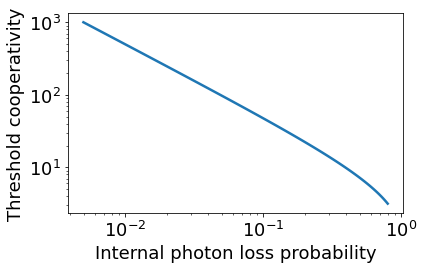

In [137]:
# cooperativity
Cooperativity = 10**np.linspace(0.5, 3, 100)
FidelityE = Cooperativity/(Cooperativity + 1)
FidelityCZ = ((Cooperativity - 1)/(Cooperativity + 1))**2

LossRate = 1 - FidelityE*FidelityCZ

plt.figure(figsize=(6,3.8))
plt.plot(LossRate, Cooperativity, linewidth=2.5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Internal photon loss probability")
plt.ylabel("Threshold cooperativity")
plt.tight_layout()
plt.savefig("s3.pdf")

In [147]:
epsilon = 10**np.linspace(-6, -2, 101)

epsilonX1 = []
epsilonZ1 = []
epsilonArb1 = []
epsilonMax1 = []
epsilonX2 = []
epsilonZ2 = []
epsilonArb2 = []
epsilonMax2 = []
epsilonX3 = []
epsilonZ3 = []
epsilonArb3 = []
epsilonMax3 = []


openX1 = open("FigS3(b)_222_X.txt", 'r')
openX1Data = openX1.read().split()
openZ1 = open("FigS3(b)_222_Z.txt", 'r')
openZ1Data = openZ1.read().split()
openArb1 = open("FigS3(b)_222_arb.txt", 'r')
openArb1Data = openArb1.read().split()

openX2 = open("FigS3(b)_353_X.txt", 'r')
openX2Data = openX2.read().split()
openZ2 = open("FigS3(b)_353_Z.txt", 'r')
openZ2Data = openZ2.read().split()
openArb2 = open("FigS3(b)_353_arb.txt", 'r')
openArb2Data = openArb2.read().split()

openX3 = open("FigS3(b)_61091_X.txt", 'r')
openX3Data = openX3.read().split()
openZ3 = open("FigS3(b)_61091_Z.txt", 'r')
openZ3Data = openZ3.read().split()
openArb3 = open("FigS3(b)_61091_arb.txt", 'r')
openArb3Data = openArb3.read().split()


for ii in range(np.size(openX1Data)):
    epsilonX1.append(float(openX1Data[ii]))
    epsilonZ1.append(float(openZ1Data[ii]))
    epsilonArb1.append(float(openArb1Data[ii]))
    epsilonMax1.append(max(float(openX1Data[ii]), float(openZ1Data[ii]), float(openArb1Data[ii])))
    
    epsilonX2.append(float(openX2Data[ii]))
    epsilonZ2.append(float(openZ2Data[ii]))
    epsilonArb2.append(float(openArb2Data[ii]))
    epsilonMax2.append(max(float(openX2Data[ii]), float(openZ2Data[ii]), float(openArb2Data[ii])))
    
    epsilonX3.append(float(openX3Data[ii]))
    epsilonZ3.append(float(openZ3Data[ii]))
    epsilonArb3.append(float(openArb3Data[ii]))
    epsilonMax3.append(max(float(openX3Data[ii]), float(openZ3Data[ii]), float(openArb3Data[ii])))
    


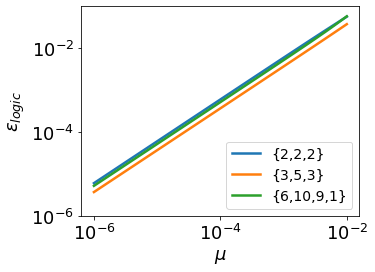

In [166]:
plt.figure(figsize=(5.3,4))
plt.plot(epsilon, epsilonMax1, linewidth=2.5, label="{2,2,2}")
plt.plot(epsilon, epsilonMax2, linewidth=2.5, label="{3,5,3}")
plt.plot(epsilon, epsilonMax3, linewidth=2.5, label="{6,10,9,1}")
plt.xscale("log")
plt.yscale("log")
plt.xticks([10**(-6), 10**(-4), 10**(-2)])
plt.yticks([10**(-6), 10**(-4), 10**(-2)])
plt.ylim(10**(-6), 10**(-1))
plt.xlabel("$\\mu$")
plt.ylabel("$\\varepsilon_{logic}$")
plt.legend(fontsize=14, loc=4)
plt.tight_layout()
# plt.savefig("s4.pdf")

In [169]:
epsilonMax3

[5.1704e-06,
 5.66923e-06,
 6.2162e-06,
 6.81593e-06,
 7.47353e-06,
 8.19457e-06,
 8.98517e-06,
 9.85206e-06,
 1.08026e-05,
 1.18448e-05,
 1.29876e-05,
 1.42406e-05,
 1.56146e-05,
 1.71211e-05,
 1.8773e-05,
 2.05842e-05,
 2.25702e-05,
 2.47478e-05,
 2.71355e-05,
 2.97536e-05,
 3.26243e-05,
 3.5772e-05,
 3.92234e-05,
 4.30078e-05,
 4.71574e-05,
 5.17074e-05,
 5.66965e-05,
 6.2167e-05,
 6.81653e-05,
 7.47425e-05,
 8.19543e-05,
 8.98622e-05,
 9.85331e-05,
 0.000108041,
 0.000118466,
 0.000129898,
 0.000142433,
 0.000156177,
 0.000171249,
 0.000187775,
 0.000205897,
 0.000225768,
 0.000247557,
 0.00027145,
 0.000297651,
 0.000326381,
 0.000357886,
 0.000392434,
 0.000430319,
 0.000471864,
 0.000517423,
 0.000567384,
 0.000622174,
 0.00068226,
 0.000748155,
 0.000820423,
 0.000899681,
 0.000986607,
 0.00108195,
 0.00118651,
 0.00130121,
 0.00142701,
 0.00156501,
 0.0017164,
 0.00188246,
 0.00206465,
 0.00226454,
 0.00248385,
 0.0027245,
 0.00298859,
 0.00327841,
 0.00359651,
 0.00394569,
 0